In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Import
# Link to the dataset: https://www.kaggle.com/datasets/andrewmvd/udemy-courses
df= pd.read_csv("./udemy_courses.csv")

In [4]:
# Information about data
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
# Number of Observation
df.shape[0]

3678

In [5]:
# Number of Values
df.shape[1]

12

In [6]:
# List of columns
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
# Number of NA in the dataset
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
# Check of their is a duplicated values
df[df.duplicated()==True]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [10]:
# Remove all duplicated values in the dataset
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()==True]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [12]:
df.shape

(3672, 12)

In [13]:
# Values types
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [14]:
# how many course their is in this data ?
df["course_title"].nunique()

3663

In [15]:
# how many subject their is in this data ?
df["subject"].nunique()

4

In [16]:
# how many subject in each course ?
df.subject.value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [17]:
# Top 3 most paid course ?
df[df["is_paid"] == True].groupby("course_title").sum().sort_values('price',ascending=False).filter(["price"]).head(3)

,price
course_title,
The Complete Web Developer Masterclass: Beginner To Advanced,215
The Ultimate Beginner's Guide to Django,200
Web Development Masterclass - Complete Certificate Course,200


In [18]:
# Top 3 worst paid course ?
df[df["is_paid"] == True].groupby("course_title").sum().sort_values('price',ascending=False).filter(["price"]).tail(3)

,price
course_title,
FullPage: The Complete Guide to Flat Websites,20
From Drawing to Illustration,20
７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,20


In [19]:
# Which are the 3 paid courses with the top number of subscribers and reviews ?
df[df['is_paid'] == 1].sort_values(["num_subscribers","num_reviews"],ascending=False).head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


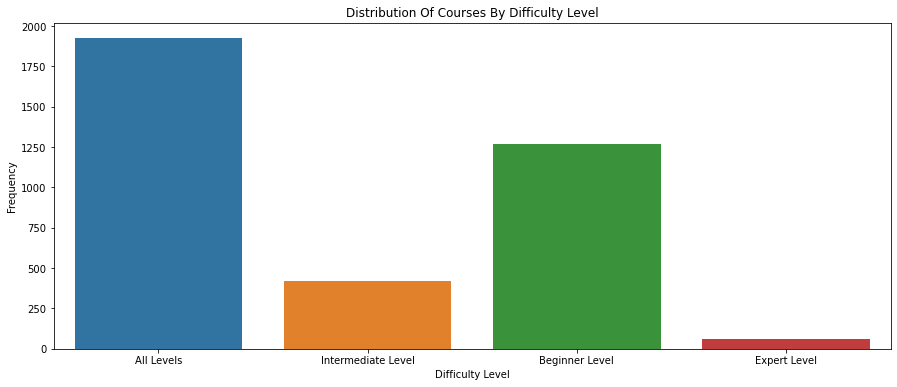

In [62]:
# The distrubition of courses based on their level
plt.figure(figsize=(15,6))
sns.countplot(df["level"])
plt.xlabel("Difficulty Level")
plt.ylabel("Frequency")
plt.title("Distribution Of Courses By Difficulty Level")
plt.show()

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


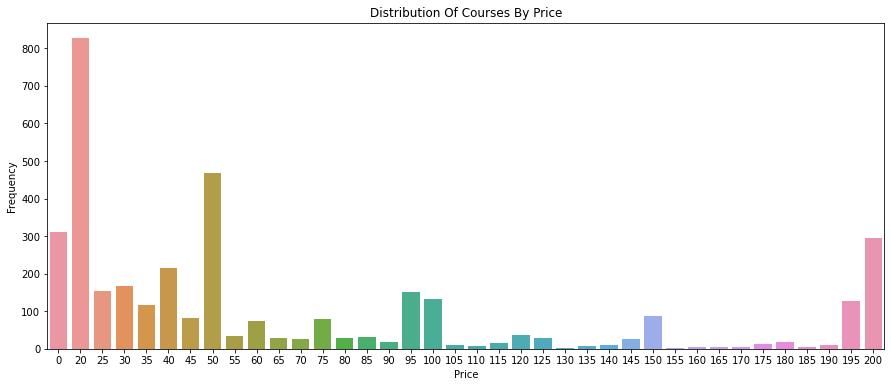

In [69]:
# Price Distribution
plt.figure(figsize=(15,6))
sns.countplot(df["price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution Of Courses By Price")
plt.show()

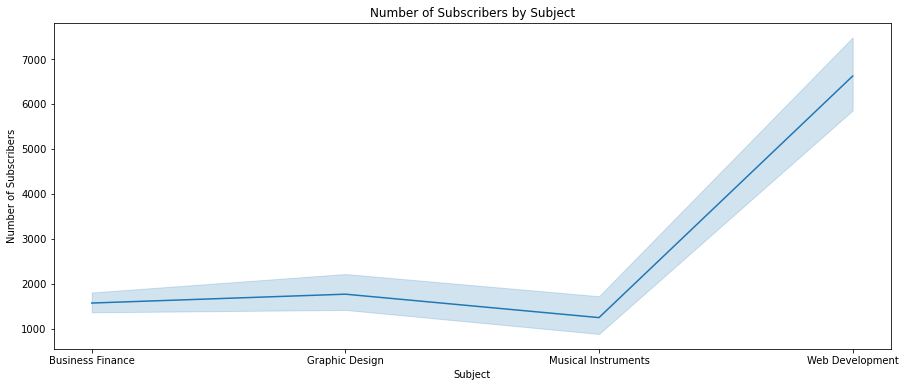

In [52]:
# Number of Subscribers by Subject
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x="subject",y="num_subscribers")
plt.xlabel("Subject")
plt.ylabel("Number of Subscribers")
plt.title("Number of Subscribers by Subject")
plt.show()

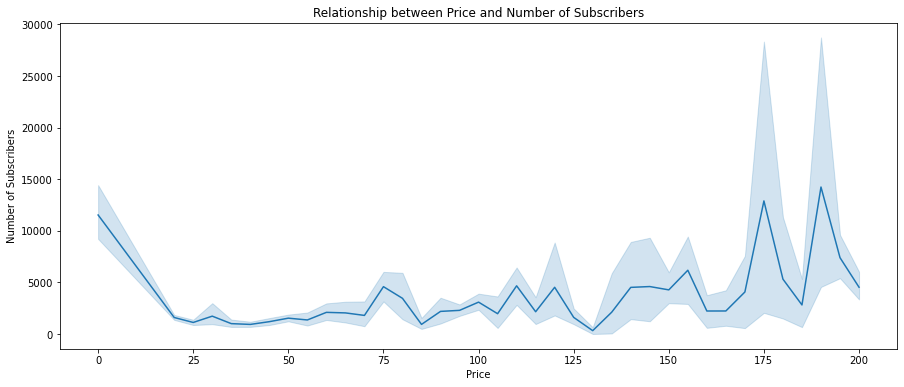

In [53]:
# Relationship between Price and Number of Subscribers
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x="price",y="num_subscribers")
plt.xlabel("Price")
plt.ylabel("Number of Subscribers")
plt.title("Relationship between Price and Number of Subscribers")
plt.show()

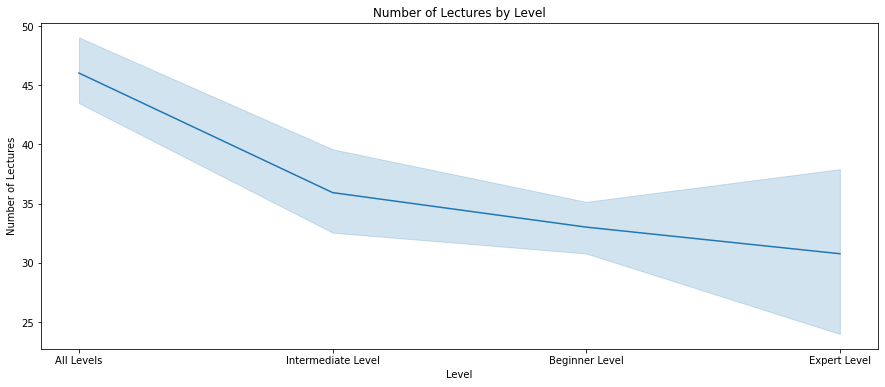

In [54]:
# Number of Lectures by Level
plt.figure(figsize=(15,6))
sns.lineplot(data=df,x="level",y="num_lectures")
plt.xlabel("Level")
plt.ylabel("Number of Lectures")
plt.title("Number of Lectures by Level")
plt.show()